# Statistical Distribution Modelling: DALL-E-3/ChatGPT

In [7]:
import sys
sys.path.append('../')
sys.path.append('../../')

from db import *
from analysis import *

In [8]:
df = (
    pd.read_csv("../../../datasets/graybox/graybox_baseline_stats.csv")
    .query('response_type == "success"')
    .query('model_slug == "gpt-4o"')
    [["total_time"]]
)
print(len(df))

378


# Plot

ks_stat=array([0.06211937]), p_value=array([0.10367526])


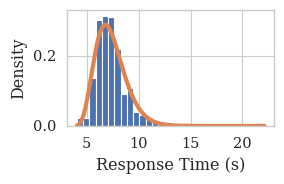

In [9]:
import scipy.stats as stats
import numpy as np

# sns.set_theme(context="paper", font='Times New Roman', font_scale=1.5, style='white')

response_time = df
# Generate a range of values for plotting the distributions
x = np.linspace(response_time.min(), response_time.max(), 1000)

# fit params
gamma_params = stats.gamma.fit(response_time)

# test fit
ks_stat, p_value = stats.kstest(response_time, 'gamma', gamma_params)
print(f'{ks_stat=}, {p_value=}')

# Log-Normal distribution
gamma_pdf = stats.gamma.pdf(x, *gamma_params)

# print(gamma_params)
sample_data = stats.gamma(*gamma_params).rvs(size=100000)

response_time = response_time.to_numpy().ravel()
# # ks_stat, p_value = stats.ks_2samp(sample_data, response_time)
# print(f'{ks_stat=}, {p_value=}')

# pd.Series(sample_data).plot.hist()
# pd.Series(response_time).plot.hist()


df.plot.hist(bins=30, figsize=(3,2), density=True, legend=False)
plt.xlabel("Response Time (s)")
plt.ylabel("Density")
# plt.legend(["Response Time"])
plt.tight_layout()

# Overlay the fitted Log-Normal distribution
plt.plot(x, gamma_pdf, label='Log-Normal Distribution (fitted)', lw=3)